# Monk1 
Grid Search for Monk1 dataset model selection


In [132]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from exclusiveAI.utils import plot_history
import os, json

#### Read MLCup KFCV Coarse GridSearch 

In [133]:

final_file = 'MLCup_models_configs2.json'

with open(final_file, 'r') as f:
    configs = [data['0'] for data in json.load(f).values()]

In [134]:
def get_best(elements, epochs, metric):
    histories = elements[0][:epochs]
    internal_configs = elements[1][:epochs]
    min_mees = []
    for el, config in zip(histories, internal_configs):
        # print(np.array(el['mee']))
        # min_mees.append({'Training ' + metric: np.array(el['mee']), 'Validation ' + metric: np.array(el['val_mee']), 'Final ' + metric: np.min(el['mee']), 'Final Validation' + metric: min(el['val_mee']), 'Model Name': config['model_name'], 'Config': config})
        differences = np.abs(np.min((np.diff(el['val_mee']) / np.mean(el['val_mee']))))
        std = np.std(el['val_mee'])
        min_mees.append([np.array(el['mee']), np.array(el['val_mee']), differences, std, np.min(el['mee']), min(el['val_mee']), config['model_name'], config.values()])
    return min_mees

my_df = get_best(configs, 100, metric='mee')
# print(my_df)
my_df = pd.DataFrame(my_df, columns=['Training History', 'Validation History', 'Diff', "Std", 'Training Mee', 'Validation Mee', 'Model Name', 'Config'])
# my_df.sort_values(by=['Diff', 'Std'], inplace=True)
# my_df.reset_index(inplace=True)
my_df

,Training History,Validation History,Diff,Std,Training Mee,Validation Mee,Model Name,Config
0,"[42.9446678162, 37.712097168, 34.9720993042, 3...","[43.3977088928, 37.8648681641, 34.589099884, 3...",1.911343,3.656640,1.172346,1.473782,Model5,"(1e-07, 0.001, mse, [tanh, sigmoid], linear, [..."
1,"[42.9303283691, 36.7013931274, 34.9984741211, ...","[43.3861961365, 37.022441864, 35.2041740417, 3...",2.121914,4.156967,1.208751,1.432444,Model1,"(1e-07, 0.001, mse, [tanh, sigmoid], linear, [..."
2,"[42.9570236206, 41.7937507629, 34.9353904724, ...","[43.4108314514, 41.1810874939, 34.5481033325, ...",2.256869,3.678668,1.164943,1.530600,Model37,"(1e-08, 0.001, mse, [tanh, sigmoid], linear, [..."
3,"[42.8948669434, 37.3970222473, 35.3051185608, ...","[43.356918335, 36.982170105, 34.7587738037, 32...",1.961319,3.909110,1.280120,1.687244,Model0,"(1e-07, 0.001, mse, [tanh, tanh], linear, [20,..."
4,"[42.9439163208, 43.9752159119, 41.2940101624, ...","[43.3952407837, 43.0965423584, 40.6518630981, ...",0.594828,4.992513,1.295199,1.707756,Model36,"(1e-08, 0.001, mse, [tanh, tanh], linear, [20,..."
...,...,...,...,...,...,...,...,...
59,"[43.2255401611, 200.9027557373, 238.8523101807...","[43.6842689514, 200.4458312988, 238.2184906006...",0.779917,39.394559,38.728432,38.876633,Model63,"(1e-08, 0.001, mse, [sigmoid, sigmoid], linear..."
60,"[42.284488678, 232.7061462402, 251.1674194336,...","[42.7815628052, 232.2680206299, 250.630569458,...",0.478200,42.009699,38.727482,38.874767,Model14,"(1e-07, 0.001, mse, [sigmoid, tanh], linear, [..."
61,"[43.1386146545, 194.8213043213, 272.9514770508...","[43.6536903381, 193.9460296631, 272.0905761719...",0.427440,48.048875,38.730122,38.877853,Model30,"(1e-07, 0.001, mse, [sigmoid, tanh], linear, [..."
62,"[42.6585693359, 217.752746582, 217.851272583, ...","[43.1394195557, 217.1538391113, 217.08644104, ...",0.357255,39.242038,38.731434,38.878048,Model62,"(1e-08, 0.001, mse, [sigmoid, tanh], linear, [..."


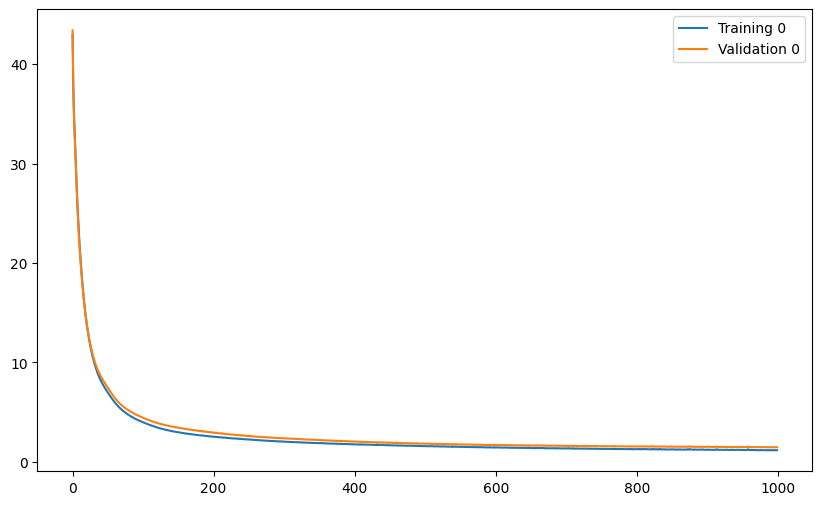

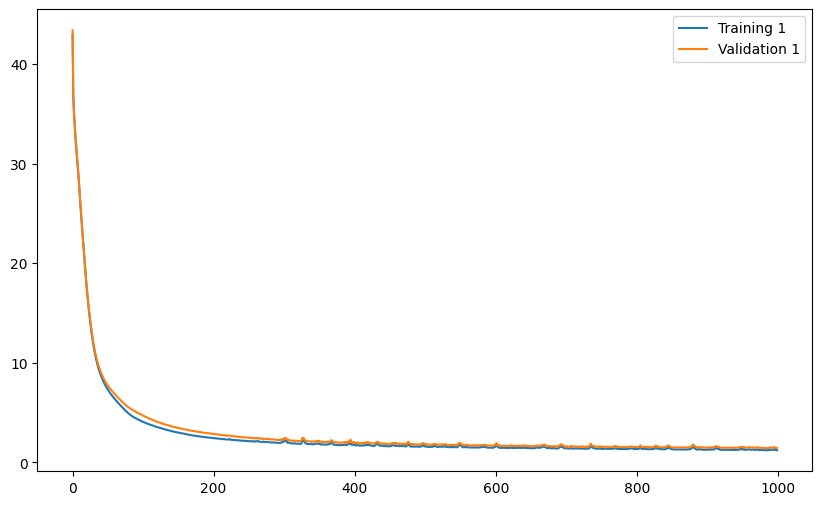

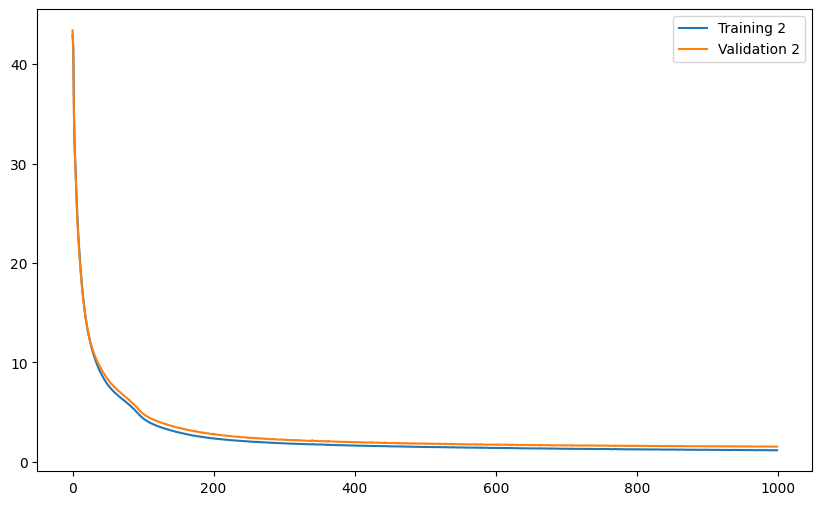

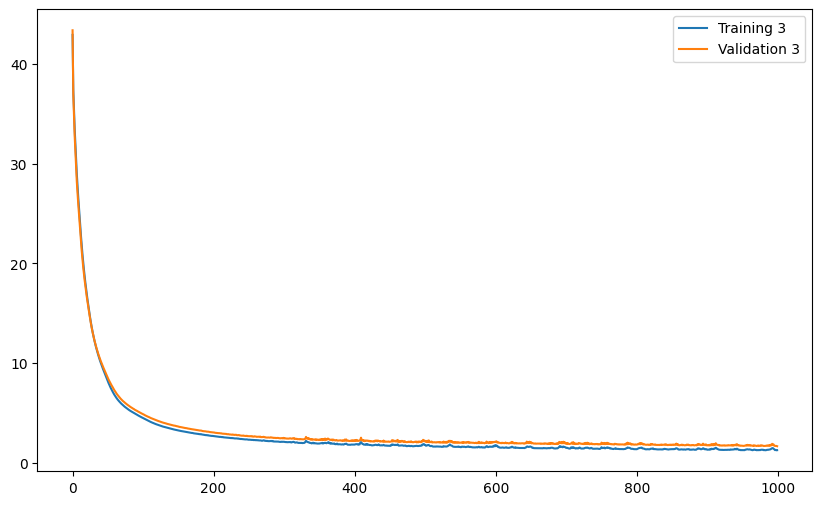

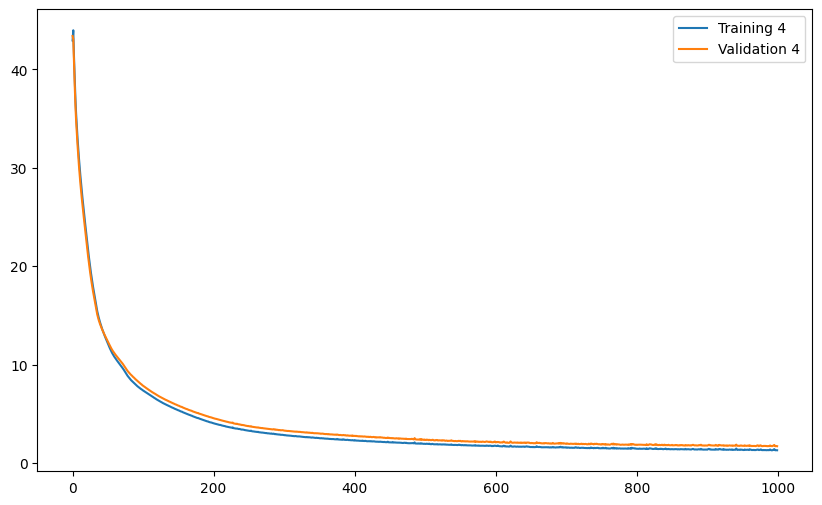

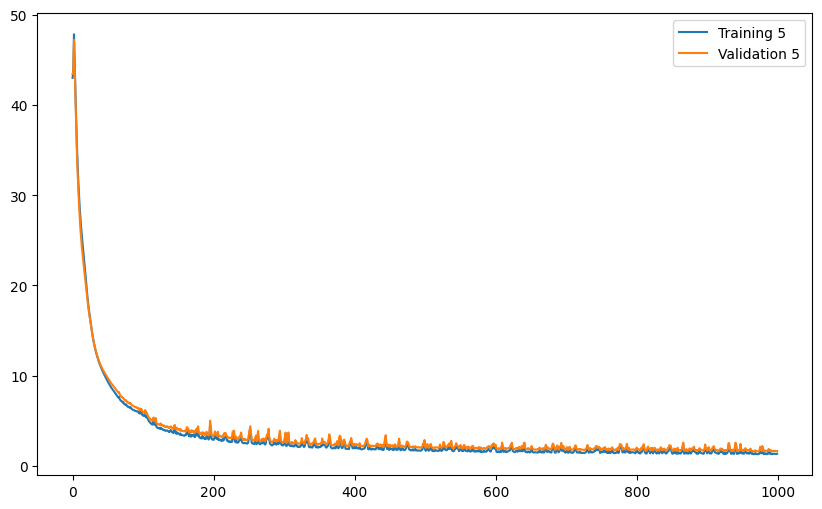

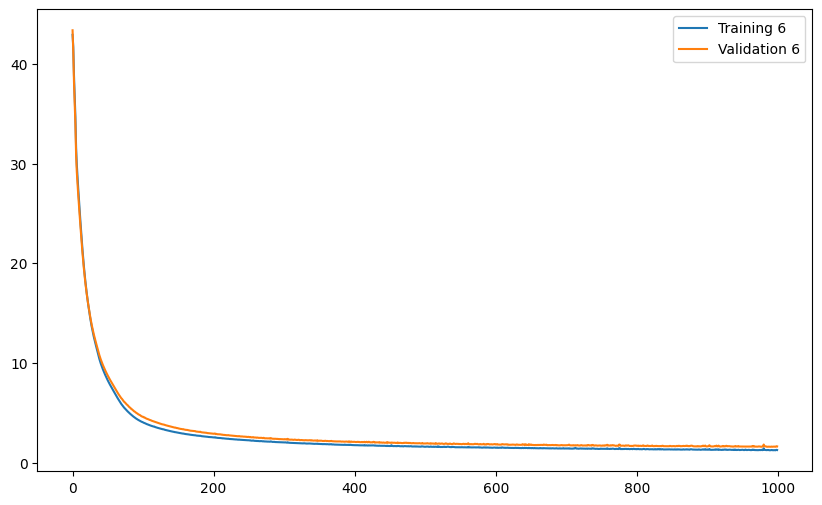

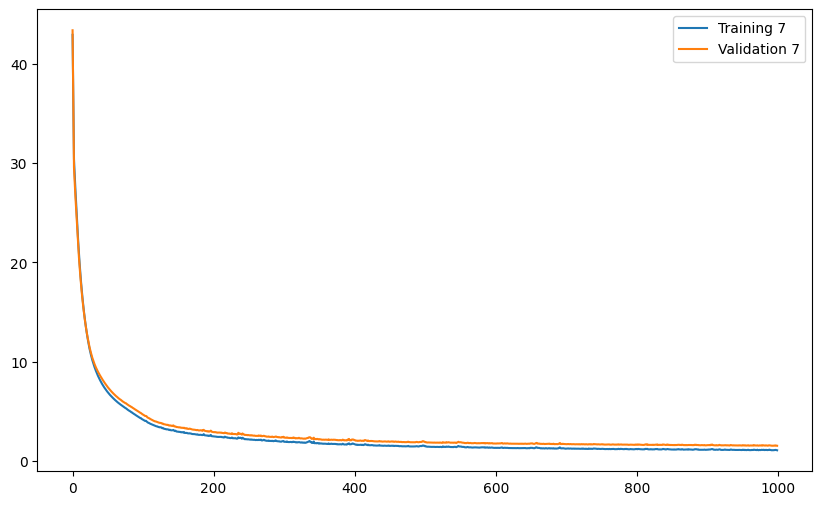

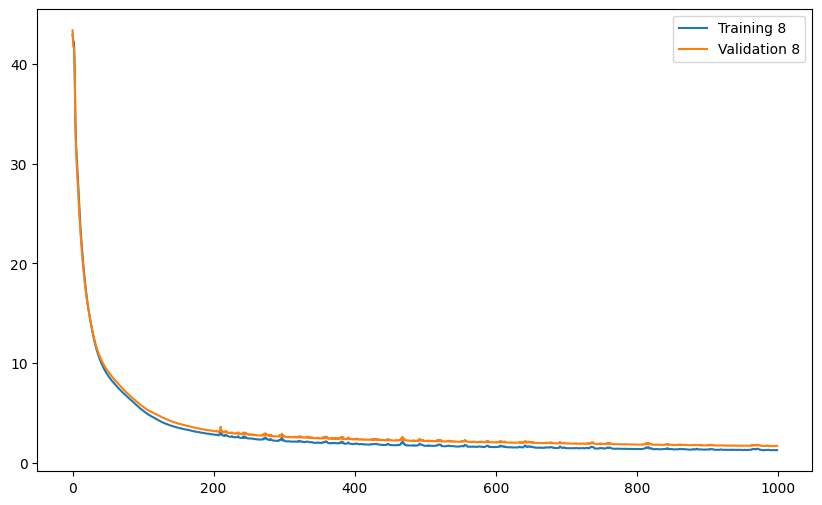

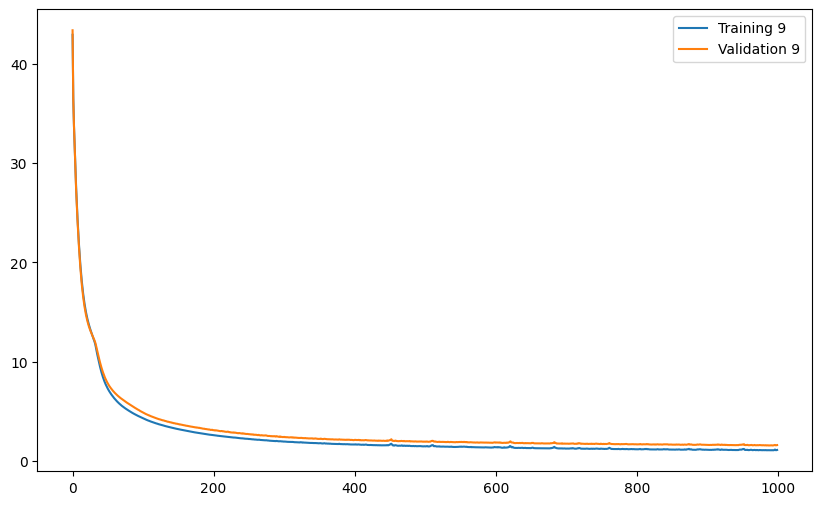

In [135]:
for i in range(10):
    plot_history({'Training '+str(i): my_df['Training History'][i], 'Validation '+str(i): my_df['Validation History'][i]})

In [ ]:
best_try = {'regularization': 1e-07, 'learning_rate': 0.005, 'loss_function': 'mse', 'activation_functions': ['sigmoid', 'sigmoid'], 'output_activation': 'linear', 'num_of_units': [20, 20], 'num_layers': 2, 'momentum': 0.1, 'optimizer': 'sgd', 'initializers': 'uniform', 'nesterov': False, 'input_shape': [750, 10], 'callbacks': ['earlystopping_1e-2_50_False_True'], 'verbose': False, 'outputs': 3, 'model_name': 'Model175'}
best_try_score = {'Train MEE': 1.31, 'Test MEE': 1.50, 'TrainKfold MEE': 1.50, 'ValidationKfold MEE': 1.56}

strange_try = {'regularization': 1e-08, 'learning_rate': 0.005, 'loss_function': 'mse', 'activation_functions': ['sigmoid', 'sigmoid'], 'output_activation': 'linear', 'num_of_units': [20, 20], 'num_layers': 2, 'momentum': 0, 'optimizer': 'sgd', 'initializers': 'uniform', 'nesterov': True, 'input_shape': [750, 10], 'callbacks': ['earlystopping_1e-2_50_False_True'], 'verbose': False, 'outputs': 3, 'model_name': 'Model235'}
strange_try_score = {'Train MEE': 1.35, 'Test MEE': 1.51, 'TrainKfold MEE': 1.47, 'ValidationKfold MEE': 1.48}

second_try = {'regularization': 0, 'learning_rate': 0.005, 'loss_function': 'mse', 'activation_functions': ['sigmoid', 'sigmoid'], 'output_activation': 'linear', 'num_of_units': [20, 20], 'num_layers': 2, 'momentum': 0.1, 'optimizer': 'sgd', 'initializers': 'uniform', 'nesterov': False, 'input_shape': [750, 10], 'callbacks': ['earlystopping_1e-2_50_False_True'], 'verbose': False, 'outputs': 3, 'e': 'Model67'}
second_try_score = {'Train MEE': 1.34, 'Test MEE': 1.56, 'TrainKfold MEE': 1.49, 'ValidationKfold MEE': 1.49}

third_try = {'regularization': 0, 'learning_rate': 0.005, 'loss_function': 'mse', 'activation_functions': ['sigmoid', 'sigmoid'], 'output_activation': 'linear', 'num_of_units': [20, 20], 'num_layers': 2, 'momentum': 0.1, 'optimizer': 'sgd', 'initializers': 'uniform', 'nesterov': True, 'input_shape': [750, 10], 'callbacks': ['earlystopping_1e-2_50_False_True'], 'verbose': False, 'outputs': 3, 'model_name': 'Model58'}
third_try_score = {'Train MEE': 1.39, 'Test MEE': 1.53, 'TrainKfold MEE': 1.59, 'ValidationKfold MEE': 1.62}

last_try = {'regularization': 1e-07, 'learning_rate': 0.001, 'loss_function': 'mse', 'activation_functions': ['tanh', 'sigmoid'], 'output_activation': 'linear', 'num_of_units': [20, 20], 'num_layers': 2, 'momentum': 0.5, 'optimizer': 'sgd', 'initializers': 'gaussian', 'nesterov': False, 'beta2': 0, 'input_shape': [750, 10], 'callbacks': ['earlystopping_1e-1_50'], 'verbose': False, 'outputs': 3, 'model_name': 'Model5'}
last_try_score = {'Train MEE': 1.07, 'Test MEE': 1.32, 'TrainKfold MEE': 1.16, 'ValidationKfold MEE': 1.20}